In [1]:
%matplotlib inline
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import skimage
from skimage import data, img_as_float,color, img_as_ubyte
from skimage import color, io
from skimage.feature import peak_local_max, canny
from skimage.transform import hough_circle,hough_circle_peaks,hough_line, hough_line_peaks
from skimage.draw import circle_perimeter
from skimage.filters import try_all_threshold, threshold_otsu, threshold_triangle, gaussian
from skimage.morphology import watershed, skeletonize
from skimage.segmentation import chan_vese, felzenszwalb, slic, quickshift, watershed,mark_boundaries
from skimage.measure import regionprops
from matplotlib import cm
import numpy as np

In [20]:
img = io.imread('images/01/92.tif')
img = img_as_float(img)
img = gaussian(img)
#fig, ax = try_all_threshold(img, figsize=(8, 16), verbose=False)
#plt.show()

Our calculated threshold value. 0.01841343771737451
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


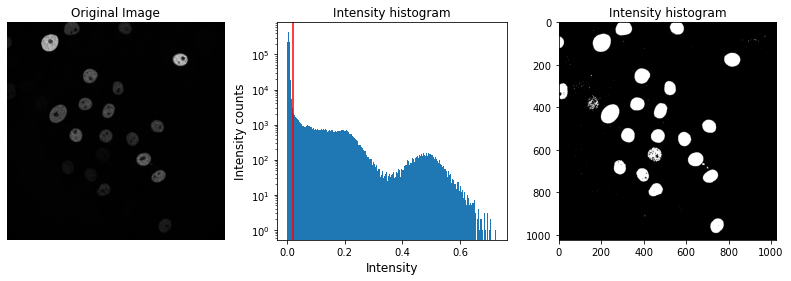

In [21]:
thresh = skimage.filters.threshold_triangle(img)
binary = img > thresh
print('Our calculated threshold value.',thresh)
fig, ax = plt.subplots(1,3, figsize=(14, 4))
ax[0].imshow(img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)
ax[1].hist(img.reshape(-1),bins=256)
ax[1].set_yscale("log")
ax[1].axvline(thresh, color='r')
ax[1].set_title("Intensity histogram", fontsize=12)
ax[1].set_ylabel("Intensity counts", fontsize=12)
ax[1].set_xlabel("Intensity", fontsize=12)
ax[2].imshow(binary, cmap="gray")
ax[2].set_title("Intensity histogram", fontsize=12)
binary = binary * 1
print(binary)

2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
26


Text(0.5, 1.0, 'Labelled cells')

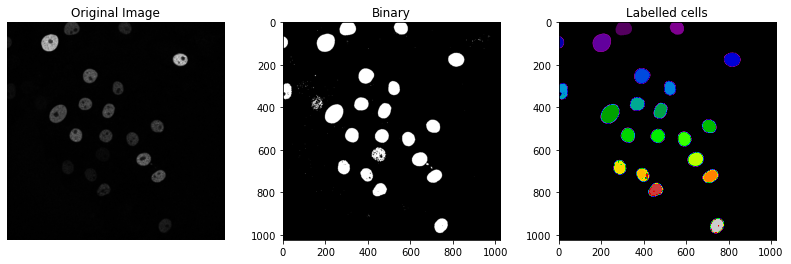

In [22]:
distance = ndi.distance_transform_edt(binary)
local_maxi = np.copy(distance)
local_maxi = local_maxi>(np.max(local_maxi)*0.2)
print(local_maxi.ndim)
coordinates = np.where(local_maxi)
markers = ndi.label(local_maxi)[0]
print(markers)
labels = watershed(-distance, markers, mask=binary)
a = np.array(labels)
print(np.max(a))
fig, ax = plt.subplots(1,3, figsize=(14, 4))

ax[0].imshow(img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(binary, cmap="gray")
ax[1].set_title("Binary", fontsize=12)

ax[2].imshow(labels,cmap=plt.cm.nipy_spectral)
ax[2].set_title("Labelled cells", fontsize=12)

Text(0.5, 1.0, 'Pruned Maxima')

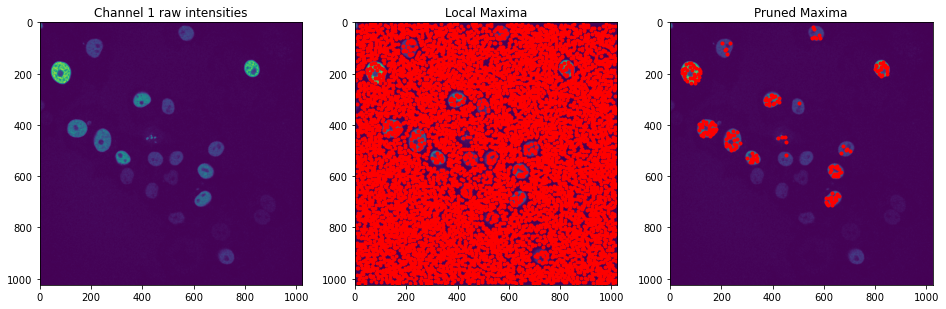

In [117]:
image_max = ndi.maximum_filter(img, size=5, mode='constant')
coordinates_raw = peak_local_max(img, min_distance=5)
THR = np.mean(img)+(np.std(img)*3.)
coordinates = coordinates_raw[img[coordinates_raw[:,0],coordinates_raw[:,1]]>THR,:]
fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax[0].imshow(img)
ax[0].set_title("Channel 1 raw intensities", fontsize=12)
ax[1].imshow(img)
ax[1].plot(coordinates_raw[:, 1], coordinates_raw[:, 0], 'r.')
ax[1].set_title("Local Maxima", fontsize=12)
ax[2].imshow(img)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].set_title("Pruned Maxima", fontsize=12)

In [118]:
props = regionprops(labels, intensity_image=img, cache=True)
int_array = []
for reg in props:
    int_array.append(reg.mean_intensity)
foci_array = []
x_points = []
y_points = []
for px in np.unique(labels)[1:]:
    cell_array = []
    for coord in coordinates:
        if labels[coord[0],coord[1]] == px:
            cell_array.append(img[coord[0],coord[1]])
    foci_array.append(np.average(cell_array))
print(foci_array)
print(len(foci_array))

[nan, 0.14704741398368856, 0.15181853830188863, 0.4605223986455099, 0.5140836798337094, 0.3106163516875804, 0.14427250447475468, nan, nan, nan, 0.2724491294685674, 0.24826601005209306, 0.258303756038984, 0.2674157473781551, 0.1510561637582615, 0.3330488744891273, nan, 0.14291854937183096, 0.240517372364293, nan, nan, 0.2309720940433023, nan, nan, nan]
25


C:\Users\nvkkr\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\nvkkr\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [119]:
props = regionprops(labels)
centroid_x = []
centroid_y = []
for prop in props:
    y, x = prop.centroid
    centroid_x.append(x)
    centroid_y.append(y)
    print(x,y)
print(len(centroid_x))

5.198653198653199 13.781144781144782
568.9233817701453 42.99735799207398
211.0897372335151 100.10064452156668
824.332546473886 180.8462673354972
81.70477991746905 196.2799174690509
395.8411945297237 301.2369522746302
498.2992452830189 328.35056603773586
7.555555555555555 319.81388888888887
4.669642857142857 334.79464285714283
1.525 343.025
146.62570056044837 412.85728582866295
242.6631977294229 459.846357615894
424.79624664879356 445.85120643431634
444.91336633663366 455.46287128712873
685.2020894547829 493.22559582109045
321.58892438764644 529.1356052538162
529.4654761904762 529.3166666666667
448.86979913916787 532.8680057388809
645.10152600436 579.995951417004
338.3203429462198 598.7739672642244
434.9618288590604 655.8015939597316
634.8689335394126 688.5400309119011
538.8010835913312 757.7159442724458
520.1234256926953 771.3324937027708
724.5663913595934 912.4297966963151
25
